<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Driver-Churn" data-toc-modified-id="Driver-Churn-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Driver Churn</a></span></li><li><span><a href="#Lifetime" data-toc-modified-id="Lifetime-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Lifetime</a></span></li><li><span><a href="#Number-of-Rides-per-Rider" data-toc-modified-id="Number-of-Rides-per-Rider-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Number of Rides per Rider</a></span></li><li><span><a href="#total-distance-per-driver" data-toc-modified-id="total-distance-per-driver-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>total distance per driver</a></span></li><li><span><a href="#total-hours-driver" data-toc-modified-id="total-hours-driver-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>total hours driver</a></span></li><li><span><a href="#total-earned" data-toc-modified-id="total-earned-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>total earned</a></span></li><li><span><a href="#Number-of-primetime-rides" data-toc-modified-id="Number-of-primetime-rides-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Number of primetime rides</a></span></li><li><span><a href="#Rides-in-first-14-days" data-toc-modified-id="Rides-in-first-14-days-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Rides in first 14 days</a></span></li><li><span><a href="#Drivers-that-have-rides-but-have-not-been-onboarded" data-toc-modified-id="Drivers-that-have-rides-but-have-not-been-onboarded-0.9"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Drivers that have rides but have not been onboarded</a></span></li><li><span><a href="#ride-ids-in-rides-table-but-not-in-timestamps-table" data-toc-modified-id="ride-ids-in-rides-table-but-not-in-timestamps-table-0.10"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>ride ids in rides table but not in timestamps table</a></span></li><li><span><a href="#Number-of-rides-on-weekends" data-toc-modified-id="Number-of-rides-on-weekends-0.11"><span class="toc-item-num">0.11&nbsp;&nbsp;</span>Number of rides on weekends</a></span></li></ul></li><li><span><a href="#avergae-lifetime-value" data-toc-modified-id="avergae-lifetime-value-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>avergae lifetime value</a></span><ul class="toc-item"><li><span><a href="#Getting-full-driver-data" data-toc-modified-id="Getting-full-driver-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting full driver data</a></span></li></ul></li></ul></div>

In [5]:
from os import kill
import pandas as pd
import numpy as np
from kiwi_ridesharing.ride import Ride
from kiwi_ridesharing.data import Kiwi

In [327]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [332]:
data = Kiwi().get_data()
matching_table = Kiwi().get_matching_table()
rides = Ride().get_full_rides_data()

In [333]:
len(rides)

193502

In [334]:
rides.isnull().sum()

ride_id                     0
requested_at             8683
accepted_at              8683
arrived_at               8683
picked_up_at             8683
dropped_off_at           8683
ride_duration_minutes       0
ride_duration_hours         0
ride_distance               0
average_speed               0
driver_wait_time         8683
customer_wait_time       8683
driver_response_time     8683
fare                        0
ride_prime_time             0
is_prime_time               0
dtype: int64

In [335]:
rides

,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,ride_duration_minutes,ride_duration_hours,ride_distance,average_speed,driver_wait_time,customer_wait_time,driver_response_time,fare,ride_prime_time,is_prime_time
0,006d61cf7446e682f7bc50b0f8a5bea5,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07,5.0,0.0,1811,20.0,4.0,141.0,25.0,9.22,50,1
1,01b522c5c3a756fbdb12e95e87507eda,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30,13.0,0.0,3362,15.0,4.0,185.0,3.0,9.01,0,0
2,029227c4c2971ce69ff2274dc798ef43,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07,10.0,0.0,3282,21.0,3.0,293.0,8.0,8.30,0,0
3,034e861343a63ac3c18a9ceb1ce0ac69,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58,56.0,1.0,65283,70.0,0.0,167.0,4.0,78.40,25,1
4,034f2e614a2f9fc7f1c2f77647d1b981,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:02,2016-04-20 22:07:02,2016-04-20 22:20:45,14.0,0.0,4115,18.0,0.0,90.0,2.0,19.54,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193497,fc717192b3512767269ff5a54b97af05,2016-06-18 01:14:52,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:21:14,2016-06-18 01:43:30,22.0,0.0,10127,27.0,3.0,319.0,60.0,15.83,0,0
193498,fd6fa5f9265d2cf83936ead663f9e0e7,2016-06-23 23:51:55,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-23 23:59:08,2016-06-24 00:06:33,7.0,0.0,1908,15.0,4.0,416.0,13.0,6.65,0,0
193499,fe0857c43025264d337dfe1d8463e503,2016-05-31 19:26:34,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:29:11,2016-05-31 19:43:46,15.0,0.0,4039,17.0,3.0,146.0,8.0,9.94,0,0
193500,ff0db0ca4557bf5b05b4da6f660a1ac1,2016-05-15 00:51:53,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 00:52:07,2016-05-15 01:05:04,13.0,0.0,4760,22.0,2.0,6.0,6.0,10.01,0,0


In [55]:
drivers = data["drivers"]
drivers.head()["driver_onboard_date"]

0    2016-03-29 00:00:00
1    2016-03-29 00:00:00
2    2016-04-05 00:00:00
3    2016-04-23 00:00:00
4    2016-04-29 00:00:00
Name: driver_onboard_date, dtype: object

In [295]:
rides = rides.merge(matching_table, on="ride_id", how="left")
rides

/Users/Moe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:9191: FutureWarning: Passing 'suffixes' which cause duplicate columns {'driver_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,ride_duration_minutes,ride_duration_hours,ride_distance,average_speed,driver_wait_time,customer_wait_time,fare,ride_prime_time,is_prime_time,driver_id_x,driver_id_y,driver_id_x,driver_id_y
0,006d61cf7446e682f7bc50b0f8a5bea5,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07,5.0,0.0,1811.0,20.0,4.0,141.0,6.14,50.0,1.0,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491
1,01b522c5c3a756fbdb12e95e87507eda,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30,13.0,0.0,3362.0,15.0,4.0,185.0,9.01,0.0,0.0,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491
2,029227c4c2971ce69ff2274dc798ef43,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07,10.0,0.0,3282.0,21.0,3.0,293.0,8.30,0.0,0.0,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491
3,034e861343a63ac3c18a9ceb1ce0ac69,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58,56.0,1.0,65283.0,70.0,0.0,167.0,62.72,25.0,1.0,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491
4,034f2e614a2f9fc7f1c2f77647d1b981,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:02,2016-04-20 22:07:02,2016-04-20 22:20:45,14.0,0.0,4115.0,18.0,0.0,90.0,9.77,100.0,1.0,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491,002be0ffdc997bd5c50703158b7c2491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193497,fc717192b3512767269ff5a54b97af05,2016-06-18 01:14:52,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:21:14,2016-06-18 01:43:30,22.0,0.0,10127.0,27.0,3.0,319.0,15.83,0.0,0.0,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78
193498,fd6fa5f9265d2cf83936ead663f9e0e7,2016-06-23 23:51:55,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-23 23:59:08,2016-06-24 00:06:33,7.0,0.0,1908.0,15.0,4.0,416.0,6.65,0.0,0.0,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78
193499,fe0857c43025264d337dfe1d8463e503,2016-05-31 19:26:34,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:29:11,2016-05-31 19:43:46,15.0,0.0,4039.0,17.0,3.0,146.0,9.94,0.0,0.0,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78
193500,ff0db0ca4557bf5b05b4da6f660a1ac1,2016-05-15 00:51:53,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 00:52:07,2016-05-15 01:05:04,13.0,0.0,4760.0,22.0,2.0,6.0,10.01,0.0,0.0,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78,ffff51a71f2f185ec5e97d59dbcd7a78


In [39]:
rides_sorted = rides.sort_values(by=["driver_id", "dropped_off_at"], ascending=True)

In [51]:
first_ride = rides_sorted.drop_duplicates("driver_id", keep="first")[["driver_id", "dropped_off_at"]]
first_ride

,driver_id,dropped_off_at
247,002be0ffdc997bd5c50703158b7c2491,2016-03-29 18:55:47
282,007f0389f9c7b03ef97098422f902e62,2016-03-29 22:48:33
330,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 11:11:36
504,0152a2f305e71d26cc964f8d4411add9,2016-04-25 16:21:24
839,01674381af7edd264113d4e6ed55ecda,2016-04-29 08:14:54
...,...,...
183433,ff419a3476e21e269e340b5f1f05414e,2016-04-26 09:34:55
183999,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28 08:41:46
184066,fff482c704d36a1afe8b8978d5486283,2016-04-08 09:20:45
184344,fffecccc49436c5389075b13209f0dfa,2016-05-06 21:36:25


In [43]:
drivers = drivers.merge(first_ride, how="left", on="driver_id")[["driver_id", "driver_onboard_date", "dropped_off_at"]]

In [48]:
def get_first_trip():
    
    drivers = data["drivers"]
    matching_table = Kiwi().get_matching_table()
    rides = Ride().get_full_rides_data()
    
    # match ride id whith driver id
    rides = rides.merge(matching_table, on="ride_id")
    # sort by driver id and dropped_off_at
    rides_sorted = rides.sort_values(by=["driver_id", "dropped_off_at"], ascending=True)
    # remove duplicate driver id and keep ones with the first dropped off timestamp
    first_ride = rides_sorted.drop_duplicates("driver_id", keep="first")
    # join with drivers table
    drivers = drivers.merge(first_ride, how="left", on="driver_id")[["driver_id", "driver_onboard_date", "dropped_off_at"]]
    
    # rename columns
    drivers.columns = [["driver_id", "driver_onboard_date", "first_ride"]]
    
    return drivers
    

In [49]:
get_first_trip()

,driver_id,driver_onboard_date,first_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,2016-03-29 18:55:47
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,2016-03-29 22:48:33
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,2016-04-05 11:11:36
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2016-04-25 16:21:24
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,2016-04-29 08:14:54
...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26 00:00:00,2016-04-26 09:34:55
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28 00:00:00,2016-03-28 08:41:46
934,fff482c704d36a1afe8b8978d5486283,2016-04-08 00:00:00,2016-04-08 09:20:45
935,fffecccc49436c5389075b13209f0dfa,2016-05-06 00:00:00,2016-05-06 21:36:25


In [53]:
from kiwi_ridesharing.drivers import Driver

In [69]:
driver = Driver().get_first_last_trip()

In [73]:
(driver["last_ride"] - driver["driver_onboard_date"]).dt.days

0      86.0
1      85.0
2      68.0
3      64.0
4      56.0
       ... 
932    61.0
933    81.0
934    34.0
935    51.0
936    54.0
Length: 937, dtype: float64

In [166]:
offline = Driver().get_max_days_offline()

In [162]:
import matplotlib.pyplot as plt

(array([1.82719e+05, 4.53000e+02, 1.15000e+02, 4.10000e+01, 2.30000e+01,
        7.00000e+00, 5.00000e+00, 6.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0. ,  7.7, 15.4, 23.1, 30.8, 38.5, 46.2, 53.9, 61.6, 69.3, 77. ]),
 <BarContainer object of 10 artists>)

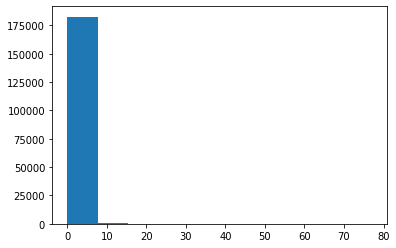

In [167]:
plt.hist(offline["max_offline"])

In [168]:
offline

,driver_id,max_offline,timestamp
0,002be0ffdc997bd5c50703158b7c2491,NaN,2016-03-29 18:55:47
1,002be0ffdc997bd5c50703158b7c2491,0.0,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,0.0,2016-03-29 20:00:02
3,002be0ffdc997bd5c50703158b7c2491,0.0,2016-03-29 21:52:41
4,002be0ffdc997bd5c50703158b7c2491,0.0,2016-03-29 22:26:03
...,...,...,...
184304,ffff51a71f2f185ec5e97d59dbcd7a78,0.0,2016-06-25 02:15:41
184305,ffff51a71f2f185ec5e97d59dbcd7a78,0.0,2016-06-25 05:58:31
184306,ffff51a71f2f185ec5e97d59dbcd7a78,0.0,2016-06-25 06:19:47
184307,ffff51a71f2f185ec5e97d59dbcd7a78,2.0,2016-06-26 23:54:26


## Driver Churn

**Assumption: A driver is considered to have churned if their last ride is more than 14 days before last recorded ride in kiwi's database**

In [ ]:
offline["timestamp"] = pd.to_datetime(offline["timestamp"])

In [393]:
last_trip = Driver().get_first_last_trip()

In [407]:
last_trip.shape

(937, 5)

In [403]:
last_timestamp_in_kiwi_database = rides["dropped_off_at"].max()

In [404]:
last_trip["is_churn"] = last_trip["last_ride"].\
apply(lambda x: 1 if (last_timestamp_in_kiwi_database - x).days >= 14 else 0)

In [408]:
last_trip

,driver_id,driver_onboard_date,first_ride,last_ride,is_churn
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-03-29 18:55:47,2016-06-23 10:29:53,0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-03-29 22:48:33,2016-06-22 13:28:38,0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-04-05 11:11:36,2016-06-12 20:30:38,1
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-04-25 16:21:24,2016-06-26 10:36:13,0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-04-29 08:14:54,2016-06-24 13:27:38,0
...,...,...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26,2016-04-26 09:34:55,2016-06-26 18:12:34,0
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,2016-03-28 08:41:46,2016-06-17 09:40:18,0
934,fff482c704d36a1afe8b8978d5486283,2016-04-08,2016-04-08 09:20:45,2016-05-12 17:00:18,1
935,fffecccc49436c5389075b13209f0dfa,2016-05-06,2016-05-06 21:36:25,2016-06-26 21:11:47,0


In [406]:
last_trip.groupby(last_trip["last_ride"].dt.month).sum()

,is_churn
last_ride,
3.0,4
4.0,40
5.0,118
6.0,95


In [250]:
# check if churn
offline["timestamp"] = pd.to_datetime(offline["timestamp"])
churn = offline.groupby(["driver_id", offline["timestamp"].dt.week], as_index=False).max()
churn["churn"] = churn["max_offline"].apply(lambda x: 1 if x>14 else 0)
churn.groupby(churn["timestamp"].dt.week).sum()

/var/folders/vp/w0q6bwv17zg47jg_mhc4nsdh0000gp/T/ipykernel_37145/1310324117.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  churn = offline.groupby(["driver_id", offline["timestamp"].dt.week], as_index=False).max()
/var/folders/vp/w0q6bwv17zg47jg_mhc4nsdh0000gp/T/ipykernel_37145/1310324117.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  churn.groupby(churn["timestamp"].dt.week).sum()


,max_offline,churn
timestamp,,
13,141.0,0
14,573.0,0
15,892.0,1
16,1370.0,4
17,1735.0,14
18,2187.0,17
19,2494.0,23
20,2543.0,25
21,2607.0,28


In [ ]:
pd.Grouper(key='Date', freq='2Y')

In [245]:
offline["timestamp"] = pd.to_datetime(offline["timestamp"])
churn = offline.groupby(["driver_id", pd.Grouper(key="timestamp", freq="W")]).max().reset_index()
churn["churn"] = churn["max_offline"].apply(lambda x: 1 if (x==np.nan) else 0)
churn

,driver_id,timestamp,max_offline,churn
0,002be0ffdc997bd5c50703158b7c2491,2016-04-03,2.0,0
1,002be0ffdc997bd5c50703158b7c2491,2016-04-10,4.0,0
2,002be0ffdc997bd5c50703158b7c2491,2016-04-17,2.0,0
3,002be0ffdc997bd5c50703158b7c2491,2016-04-24,3.0,0
4,002be0ffdc997bd5c50703158b7c2491,2016-05-01,3.0,0
...,...,...,...,...
6425,ffff51a71f2f185ec5e97d59dbcd7a78,2016-06-05,1.0,0
6426,ffff51a71f2f185ec5e97d59dbcd7a78,2016-06-12,3.0,0
6427,ffff51a71f2f185ec5e97d59dbcd7a78,2016-06-19,2.0,0
6428,ffff51a71f2f185ec5e97d59dbcd7a78,2016-06-26,2.0,0


In [211]:
churn.groupby(pd.Grouper(key="timestamp", freq="M")).sum()

,max_offline,churn
timestamp,,
2016-03-31,64.0,0
2016-04-30,2570.0,18
2016-05-31,5739.0,94
2016-06-30,5986.0,112


In [239]:
first_ride = Driver().get_days_since_last_ride()

In [241]:
first_ride[first_ride["driver_id"]=="007f0389f9c7b03ef97098422f902e62"]

,driver_id,driver_onboard_date,first_ride,last_ride,last_online
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-03-29 22:48:33,2016-06-22 13:28:38,4.0


In [235]:
driver_1 = rides[rides["driver_id"] == "007f0389f9c7b03ef97098422f902e62"][["driver_id", "dropped_off_at"]]

In [236]:
driver_1.set_index("driver_id", inplace=True)
driver_1.sort_values("dropped_off_at", ascending=True, inplace=True)

In [237]:
driver_1["offset"] = driver_1.diff()["dropped_off_at"]

In [238]:
driver_1[driver_1["offset"] == driver_1["offset"].max()]

,dropped_off_at,offset
driver_id,,
007f0389f9c7b03ef97098422f902e62,2016-04-24 15:53:38,15 days 19:08:22


## Lifetime

In [409]:
Driver().get_lifetime()

,driver_id,driver_onboard_date,last_ride,is_churn,lifetime
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23 10:29:53,0,90.0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22 13:28:38,0,90.0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12 20:30:38,1,68.0
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26 10:36:13,0,65.0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24 13:27:38,0,59.0
...,...,...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26,2016-06-26 18:12:34,0,62.0
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,2016-06-17 09:40:18,0,91.0
934,fff482c704d36a1afe8b8978d5486283,2016-04-08,2016-05-12 17:00:18,1,34.0
935,fffecccc49436c5389075b13209f0dfa,2016-05-06,2016-06-26 21:11:47,0,52.0


## Number of Rides per Rider


In [253]:
num_rides = Driver().get_number_of_rides()
num_rides

,driver_id,ride_count
0,002be0ffdc997bd5c50703158b7c2491,277
1,007f0389f9c7b03ef97098422f902e62,31
2,011e5c5dfc5c2c92501b8b24d47509bc,34
3,0152a2f305e71d26cc964f8d4411add9,191
4,01674381af7edd264113d4e6ed55ecda,375
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,242
933,ff714a67ba8c6a108261cd81e3b77f3a,485
934,fff482c704d36a1afe8b8978d5486283,35
935,fffecccc49436c5389075b13209f0dfa,406


In [368]:
num_rides[num_rides["ride_count"] == 0]

,driver_id,ride_count
5,01788cf817698fe68eaecd7eb18b2f72,0
59,133faf644d5cfee9460b87eea4367f92,0
61,136b51093f684e15e2798e4dc1e23d0c,0
62,13fe6713788e9b63f57950320f260512,0
64,146cd888491dd0f348575244f5bbc24e,0
...,...,...
896,f24c7a1f58df6b9e7ee7f01012e601ac,0
899,f429fcd3fe77e166454f9b27813b07d1,0
910,f9893308ea5859d7ede4e034086c461c,0
920,fc857228f75499b2f24b3d547e12b9e9,0


## total distance per driver

In [258]:
distance = Driver().get_total_distance()
distance

,driver_id,total_distance
0,002be0ffdc997bd5c50703158b7c2491,1740.29
1,007f0389f9c7b03ef97098422f902e62,117.53
2,011e5c5dfc5c2c92501b8b24d47509bc,269.65
3,0152a2f305e71d26cc964f8d4411add9,1471.24
4,01674381af7edd264113d4e6ed55ecda,3123.64
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2002.40
933,ff714a67ba8c6a108261cd81e3b77f3a,2834.76
934,fff482c704d36a1afe8b8978d5486283,174.39
935,fffecccc49436c5389075b13209f0dfa,2924.91


## total hours driver

In [259]:
hours = Driver().get_total_hours()
hours

,driver_id,total_driving_time
0,002be0ffdc997bd5c50703158b7c2491,61.43
1,007f0389f9c7b03ef97098422f902e62,5.65
2,011e5c5dfc5c2c92501b8b24d47509bc,8.13
3,0152a2f305e71d26cc964f8d4411add9,48.50
4,01674381af7edd264113d4e6ed55ecda,99.28
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,68.50
933,ff714a67ba8c6a108261cd81e3b77f3a,122.75
934,fff482c704d36a1afe8b8978d5486283,7.73
935,fffecccc49436c5389075b13209f0dfa,98.42


## total earned

In [261]:
earned = Driver().get_total_earned()
earned

,driver_id,total_earned
0,002be0ffdc997bd5c50703158b7c2491,2923.29
1,007f0389f9c7b03ef97098422f902e62,265.30
2,011e5c5dfc5c2c92501b8b24d47509bc,395.70
3,0152a2f305e71d26cc964f8d4411add9,2118.02
4,01674381af7edd264113d4e6ed55ecda,4370.78
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2875.31
933,ff714a67ba8c6a108261cd81e3b77f3a,5149.16
934,fff482c704d36a1afe8b8978d5486283,307.46
935,fffecccc49436c5389075b13209f0dfa,5011.82


## Number of primetime rides

In [262]:
primetime = Driver().get_primetime_rides()
primetime

,driver_id,prime_time_rides
0,002be0ffdc997bd5c50703158b7c2491,110.0
1,007f0389f9c7b03ef97098422f902e62,12.0
2,011e5c5dfc5c2c92501b8b24d47509bc,16.0
3,0152a2f305e71d26cc964f8d4411add9,48.0
4,01674381af7edd264113d4e6ed55ecda,99.0
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,70.0
933,ff714a67ba8c6a108261cd81e3b77f3a,182.0
934,fff482c704d36a1afe8b8978d5486283,4.0
935,fffecccc49436c5389075b13209f0dfa,215.0


## Rides in first 14 days

In [365]:
rides

,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,ride_duration_minutes,ride_duration_hours,ride_distance,average_speed,driver_wait_time,customer_wait_time,driver_response_time,fare,ride_prime_time,is_prime_time
0,006d61cf7446e682f7bc50b0f8a5bea5,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07,5.0,0.0,1811,20.0,4.0,141.0,25.0,9.22,50,1
1,01b522c5c3a756fbdb12e95e87507eda,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30,13.0,0.0,3362,15.0,4.0,185.0,3.0,9.01,0,0
2,029227c4c2971ce69ff2274dc798ef43,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07,10.0,0.0,3282,21.0,3.0,293.0,8.0,8.30,0,0
3,034e861343a63ac3c18a9ceb1ce0ac69,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58,56.0,1.0,65283,70.0,0.0,167.0,4.0,78.40,25,1
4,034f2e614a2f9fc7f1c2f77647d1b981,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:02,2016-04-20 22:07:02,2016-04-20 22:20:45,14.0,0.0,4115,18.0,0.0,90.0,2.0,19.54,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193497,fc717192b3512767269ff5a54b97af05,2016-06-18 01:14:52,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:21:14,2016-06-18 01:43:30,22.0,0.0,10127,27.0,3.0,319.0,60.0,15.83,0,0
193498,fd6fa5f9265d2cf83936ead663f9e0e7,2016-06-23 23:51:55,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-23 23:59:08,2016-06-24 00:06:33,7.0,0.0,1908,15.0,4.0,416.0,13.0,6.65,0,0
193499,fe0857c43025264d337dfe1d8463e503,2016-05-31 19:26:34,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:29:11,2016-05-31 19:43:46,15.0,0.0,4039,17.0,3.0,146.0,8.0,9.94,0,0
193500,ff0db0ca4557bf5b05b4da6f660a1ac1,2016-05-15 00:51:53,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 00:52:07,2016-05-15 01:05:04,13.0,0.0,4760,22.0,2.0,6.0,6.0,10.01,0,0


In [264]:
drivers

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26 00:00:00
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28 00:00:00
934,fff482c704d36a1afe8b8978d5486283,2016-04-08 00:00:00
935,fffecccc49436c5389075b13209f0dfa,2016-05-06 00:00:00


In [270]:
drivers.merge(rides, on="driver_id", how="right")[["driver_id", "ride_id", "driver_onboard_date", "dropped_off_at"]]

,driver_id,ride_id,driver_onboard_date,dropped_off_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,2016-03-29 00:00:00,2016-04-23 02:22:07
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,2016-03-29 00:00:00,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,2016-03-29 00:00:00,2016-06-21 12:11:07
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,2016-03-29 00:00:00,2016-05-19 10:13:58
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,2016-03-29 00:00:00,2016-04-20 22:20:45
...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,2016-05-04 00:00:00,2016-06-18 01:43:30
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,2016-05-04 00:00:00,2016-06-24 00:06:33
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,2016-05-04 00:00:00,2016-05-31 19:43:46
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,2016-05-04 00:00:00,2016-05-15 01:05:04


In [284]:
drivers_new[drivers_new["driver_onboard_date"].isnull()]["driver_id"].unique()

array(['17c09e7e39d8ab4bb4e035061d43ecdd',
       '182a0089c24f844efcc4daa5a21eb895',
       '2715aa38740fc559be08fd54dccd1803',
       'd4aa396834f13300174eabfaf0b40b50',
       'd4eaaf54bb4d9446ec26ce36f33ef94f',
       'e9555a277c135c402a14d12b819de1aa',
       'ec27575c98217627a852f24fe4233e5d'], dtype=object)

In [285]:
drivers[drivers["driver_id"] == "d4aa396834f13300174eabfaf0b40b50"]

,driver_id,driver_onboard_date


In [286]:
rides[rides["driver_id"] == "d4aa396834f13300174eabfaf0b40b50"]

,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,ride_duration_minutes,ride_duration_hours,ride_distance,average_speed,driver_wait_time,customer_wait_time,fare,ride_prime_time,is_prime_time,driver_id
157630,0069c46ec94bb6d9621b4112c6d624b7,2016-05-17 18:46:42,2016-05-17 18:46:51,2016-05-17 18:49:54,2016-05-17 18:49:57,2016-05-17 19:10:18,20.0,0.0,5461,16.0,3,183,12.05,25,1,d4aa396834f13300174eabfaf0b40b50
157631,04059c19f968f229021e653c66b49d58,2016-05-17 09:30:50,2016-05-17 09:31:02,2016-05-17 09:34:32,2016-05-17 09:34:34,2016-05-17 10:04:31,30.0,0.0,28819,58.0,2,210,30.94,0,0,d4aa396834f13300174eabfaf0b40b50
157632,057434671c27d002d18914b3c31f341a,2016-05-17 10:11:51,2016-05-17 10:12:07,2016-05-17 10:15:03,2016-05-17 10:15:08,2016-05-17 10:25:03,10.0,0.0,5649,34.0,5,176,9.99,0,0,d4aa396834f13300174eabfaf0b40b50
157633,0cc375c553498d567c41a25373b2a462,2016-05-15 19:12:27,2016-05-15 19:12:33,2016-05-15 19:19:20,2016-05-15 19:19:20,2016-05-15 19:25:14,6.0,0.0,1451,15.0,0,407,6.11,0,0,d4aa396834f13300174eabfaf0b40b50
157634,145d278246fccfaccd0e9d01511dfcb9,2016-06-18 12:19:05,2016-06-18 12:19:13,2016-06-18 12:23:39,2016-06-18 12:23:41,2016-06-18 12:37:11,14.0,0.0,3775,17.0,2,266,9.53,0,0,d4aa396834f13300174eabfaf0b40b50
157635,17a7a0d0e6787cc776acd4dab4ba3a97,2016-05-18 10:59:03,2016-05-18 10:59:15,2016-05-18 11:05:56,2016-05-18 11:06:01,2016-05-18 11:22:05,16.0,0.0,5155,19.0,5,401,10.95,0,0,d4aa396834f13300174eabfaf0b40b50
157636,17c8f603f91fce56942921c18c3f2c1b,2016-05-18 12:43:20,2016-05-18 12:43:21,2016-05-18 12:52:18,2016-05-18 12:52:23,2016-05-18 13:00:43,8.0,0.0,5899,42.0,5,537,9.73,0,0,d4aa396834f13300174eabfaf0b40b50
157637,228a72c51e4bf0391c57f19664998edf,2016-05-17 18:33:46,2016-05-17 18:33:52,2016-05-17 18:37:15,2016-05-17 18:37:16,2016-05-17 18:45:01,8.0,0.0,2080,16.0,1,203,7.00,25,1,d4aa396834f13300174eabfaf0b40b50
157638,231b5be01a219f2fd2fcc54d2821e5fa,2016-05-17 14:26:45,2016-05-17 14:26:52,2016-05-17 14:29:42,2016-05-17 14:29:42,2016-05-17 14:42:36,13.0,0.0,4137,19.0,0,170,9.57,25,1,d4aa396834f13300174eabfaf0b40b50
157639,3195f2cf113ebc47b32a51a839ea82d6,2016-05-13 09:38:35,2016-05-13 09:38:42,2016-05-13 09:40:46,2016-05-13 09:40:47,2016-05-13 09:57:00,16.0,0.0,2979,11.0,1,124,9.40,0,0,d4aa396834f13300174eabfaf0b40b50


In [274]:
rides["driver_id"].nunique()

844

In [277]:
drivers["driver_id"].nunique()

937

## Drivers that have rides but have not been onboarded

In [303]:
data["rides"].merge(data["drivers"], on="driver_id", how="outer").isnull().sum()

driver_id                 0
ride_id                  83
ride_distance            83
ride_duration            83
ride_prime_time          83
driver_onboard_date    7611
dtype: int64

In [321]:
data["rides"]

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0


In [306]:
data["rides"][~data["rides"]["driver_id"].isin(data["drivers"]["driver_id"])]["driver_id"].unique()

array(['056175954c78be4c4de7e80167b7e1f9',
       '0d993c2eba3d9dd2e60ecc8814618931',
       '0ed6cac7a3e2f1b324f50086f288bcfc',
       '0ef7e21012a26a8f3678f02c211488ae',
       '110484e77a78d2e441af9a01a7bf4ce6',
       '17c09e7e39d8ab4bb4e035061d43ecdd',
       '17dd3e3b2551857d6cc8ff106936676d',
       '182a0089c24f844efcc4daa5a21eb895',
       '182c1429cf5b585424fe676a632836df',
       '190abbe65af2b77794e0a6beb37cc613',
       '1b3e75000525f6231606ba9fc755fecc',
       '1bcc1e136b0515da625e163be33bbc48',
       '1bcf1520b0837676f006825880b133a9',
       '1d4f979b3f0dda07f55d459c4b69a258',
       '1d5bb1726114e5b950619517a6dd81c3',
       '1e581fdbb43900bf8d366cc0ed33ba47',
       '208b04693b8a9ef849d894070537aa79',
       '211e4df57e1657e4b97c9dabf2f99697',
       '234bb57cea53cfb13d8faf4a2900341a',
       '2486ffe6e7e21083d3e7fcf38907c0b4',
       '2715aa38740fc559be08fd54dccd1803',
       '2c985e2b039f99a0eaf86c50a7b1af42',
       '2ceb9ff7898dccb3e0a77ea559c6b2f2',
       '2fc

In [309]:
data["drivers"][data["drivers"]["driver_id"] == "d46c4b19c19ee6403fd41ec273433e1b"]

,driver_id,driver_onboard_date


There 83 drivers that have had rides but were never onboared (life time value cannot be calculted)

- A driver who has been onboared doen'st need to have rides
- A driver who has rides must be onboarded

## ride ids in rides table but not in timestamps table

In [318]:
data["rides"][~data["rides"]["ride_id"].isin(data["timestamps"]["ride_id"])]["ride_id"].nunique()

8683

we have 8683 ride ids (with duration, distance and Primetime) but no timestamp information

## Number of rides on weekends

In [358]:
rides["dropped_off_at"].dt.day_name()

0          Saturday
1           Tuesday
2           Tuesday
3          Thursday
4         Wednesday
            ...    
193497     Saturday
193498       Friday
193499      Tuesday
193500       Sunday
193501       Sunday
Name: dropped_off_at, Length: 193502, dtype: object

In [364]:
Driver().get_weekend_weekday_rides()

,driver_id,rides_weekday,rides_weekend
0,002be0ffdc997bd5c50703158b7c2491,214.0,63.0
1,007f0389f9c7b03ef97098422f902e62,22.0,9.0
2,011e5c5dfc5c2c92501b8b24d47509bc,18.0,16.0
3,0152a2f305e71d26cc964f8d4411add9,152.0,39.0
4,01674381af7edd264113d4e6ed55ecda,375.0,0.0
...,...,...,...
932,fff482c704d36a1afe8b8978d5486283,35.0,0.0
933,fffecccc49436c5389075b13209f0dfa,274.0,132.0
934,ffff51a71f2f185ec5e97d59dbcd7a78,179.0,151.0
935,42256e33936dfa69088f540a720edc97,0.0,35.0


# avergae lifetime value

In [410]:
altv, lifetime_value_df = Driver().get_lifetime_value()

844


In [411]:
altv

454.6620786539773

In [412]:
lifetime_value_df.isnull().sum()

driver_id                         0
lifetime_in_days                  0
kiwi_average_monthly_revenue    100
average_lifetime_value          100
dtype: int64

In [413]:
lifetime_value_df

,driver_id,lifetime_in_days,kiwi_average_monthly_revenue,average_lifetime_value
0,002be0ffdc997bd5c50703158b7c2491,90.0,182.717500,548.152500
1,007f0389f9c7b03ef97098422f902e62,90.0,16.587500,49.762500
2,011e5c5dfc5c2c92501b8b24d47509bc,68.0,32.983333,74.762222
3,0152a2f305e71d26cc964f8d4411add9,65.0,176.513333,382.445556
4,01674381af7edd264113d4e6ed55ecda,59.0,364.230000,716.319000
...,...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,62.0,239.620000,495.214667
933,ff714a67ba8c6a108261cd81e3b77f3a,91.0,321.825000,976.202500
934,fff482c704d36a1afe8b8978d5486283,34.0,38.435000,43.559667
935,fffecccc49436c5389075b13209f0dfa,52.0,626.435000,1085.820667


## Getting full driver data

In [432]:
driver = Driver()

In [433]:
data = driver.get_driver_training_data()

844


In [435]:
data.isnull().sum()

driver_id                         0
driver_onboard_date               0
first_ride                      100
last_ride                       100
is_churn                          0
lifetime                          0
days_since_last_ride            100
timestamp                       100
last_online                     100
ride_count                        0
total_distance                    0
total_driving_time                0
total_earned                      0
prime_time_rides                  0
average_speed                    83
average_waittime                100
average_response_time           100
rides_weekday                     0
rides_weekend                     0
lifetime_in_days                  0
kiwi_average_monthly_revenue    100
average_lifetime_value          100
dtype: int64

In [437]:
data.columns

Index(['driver_id', 'driver_onboard_date', 'first_ride', 'last_ride',
       'is_churn', 'lifetime', 'days_since_last_ride', 'timestamp',
       'last_online', 'ride_count', 'total_distance', 'total_driving_time',
       'total_earned', 'prime_time_rides', 'average_speed', 'average_waittime',
       'average_response_time', 'rides_weekday', 'rides_weekend',
       'lifetime_in_days', 'kiwi_average_monthly_revenue',
       'average_lifetime_value'],
      dtype='object')